# 지도 시각화 테스트

In [3]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------------------------  317.4/323.6 kB 20.5 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/15.9 MB 13.5 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.9 MB 12.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 11.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/15.9 MB 11.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.9 MB 11.4 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/15.9 MB 11.4 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/15.9 MB 11.3 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/15.9 MB 11.5 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/15.9 MB 11.5 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [252]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcdefaults()


In [253]:
file_path = r'C:\Users\j2982\jupyter notebook\안심구역_죽은상권살리기\서울시 상권분석서비스(영역-상권)\서울시 상권분석서비스(영역-상권).shp'
data = gpd.read_file(file_path)
data.head()

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,"POLYGON ((196955.842 453722.114, 196958.669 45..."
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,"POLYGON ((201385.38 452513.725, 201385.284 452..."
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,"POLYGON ((201937.121 452552.083, 201872.576 45..."
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,"POLYGON ((197550.67 453079.887, 197554.026 453..."
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,"POLYGON ((197428.009 453548.216, 197436.697 45..."


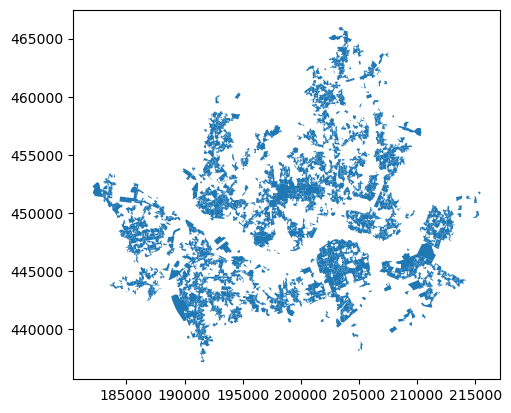

In [87]:
data.plot()
plt.show()

# 1. 죽은 상권 / 뜨는 상권 정의하기

## 파일 불러오기

In [1]:
import geopandas as gpd

file_path = 'data\서울시 상권분석서비스(영역-상권)\서울시 상권분석서비스(영역-상권).shp'
data = gpd.read_file(file_path)

In [2]:
import pandas as pd

# 파일 경로를 지정하세요
path_2019_store = 'data/서울시_상권분석서비스(점포-상권)_2019년.csv'
path_2024_store = 'data/서울시 상권분석서비스(점포-상권).csv'
path_2019_sales = 'data/서울시_상권분석서비스(추정매출-상권)_2019년.csv'
path_2024_sales = 'data/서울시 상권분석서비스(추정매출-상권).csv'
path_floating = 'data/서울시 상권분석서비스(길단위인구-상권).csv'

# CSV 파일을 데이터프레임으로 불러오기
df_2019_store = pd.read_csv(path_2019_store, encoding='euc-kr')
df_2024_store = pd.read_csv(path_2024_store, encoding='euc-kr')
df_2019_sales = pd.read_csv(path_2019_sales, encoding='euc-kr')
df_2024_sales = pd.read_csv(path_2024_sales, encoding='euc-kr')
df_floating = pd.read_csv(path_floating, encoding= 'euc-kr')

# 데이터프레임 확인
print(df_2019_store.head())
print(df_2024_store.head())
print(df_2019_sales.head())
print(df_2024_sales.head())
print(df_floating.head())

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명 서비스_업종_코드  \
0      20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
1      20191        D       발달상권  3120165        서래마을카페거리(서래마을)  CS100007   
2      20191        D       발달상권  3120177               신논현역 1번  CS300015   
3      20191        A       골목상권  3110508                 서연중학교  CS200041   
4      20191        A       골목상권  3110241                먹골역 5번  CS300036   

  서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수  
0      전자상거래업    10          10    10        1     0        0           0  
1       치킨전문점     0           1     0        0   100        1           1  
2          가방     3           3     0        0     0        0           0  
3         사진관     6           6    17        1     0        0           0  
4        조명용품     2           2     0        0     0        0           0  
   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0   

In [3]:
list(set(df_2019_store['상권_구분_코드_명']))

['골목상권', '관광특구', '전통시장', '발달상권']

## 원하는 형태의 데이터 테이블 만들기

원하는 열만 선택하기

서비스 업종별로 나누어져있어 상권별로 접포수, 매출액 합치기

In [4]:
selected_columns = [
    '기준_년분기_코드', '상권_코드',
    '상권_코드_명', '점포_수',
]
df_2019_store_selected = df_2019_store[selected_columns]
df_2024_store_selected = df_2024_store[selected_columns]
print(df_2019_store_selected.head())
print(df_2024_store_selected.head())

   기준_년분기_코드    상권_코드               상권_코드_명  점포_수
0      20191  3130018  동대문문구완구거리(동대문문구완구시장)    10
1      20191  3120165        서래마을카페거리(서래마을)     0
2      20191  3120177               신논현역 1번     3
3      20191  3110508                 서연중학교     6
4      20191  3110241                먹골역 5번     2
   기준_년분기_코드    상권_코드   상권_코드_명  점포_수
0      20231  3001491  이태원 관광특구   165
1      20231  3001491  이태원 관광특구    18
2      20231  3001491  이태원 관광특구    22
3      20231  3001491  이태원 관광특구   236
4      20231  3001491  이태원 관광특구    21


In [5]:
df_2019_store_grouped = df_2019_store_selected[df_2019_store_selected['기준_년분기_코드'] == 20191]
df_2019_store_grouped = df_2019_store_grouped.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '점포_수': 'sum',
}).reset_index()
df_2019_store_grouped

,기준_년분기_코드,상권_코드,상권_코드_명,점포_수
0,20191,3001491,이태원 관광특구,1676
1,20191,3001492,명동 남대문 북창동 다동 무교동 관광특구,9063
2,20191,3001493,동대문패션타운 관광특구,13496
3,20191,3001494,종로·청계 관광특구,5158
4,20191,3001495,잠실 관광특구,2212
...,...,...,...,...
1643,20191,3130323,둔촌역전통시장,167
1644,20191,3130324,길동복조리시장,101
1645,20191,3130325,명일전통시장,88
1646,20191,3130326,고덕 골목형상점가,71


In [6]:
df_2024_store_grouped = df_2024_store_selected[df_2024_store_selected['기준_년분기_코드'] == 20241]
df_2024_store_grouped = df_2024_store_grouped.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '점포_수': 'sum',
}).reset_index()
df_2024_store_grouped

,기준_년분기_코드,상권_코드,상권_코드_명,점포_수
0,20241,3001491,이태원 관광특구,1696
1,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,8269
2,20241,3001493,동대문패션타운 관광특구,11314
3,20241,3001494,종로?청계 관광특구,4878
4,20241,3001495,잠실 관광특구,2376
...,...,...,...,...
1643,20241,3130323,둔촌역전통시장,166
1644,20241,3130324,길동복조리시장,117
1645,20241,3130325,명일전통시장,99
1646,20241,3130326,고덕 골목형상점가,155


In [7]:
#df_2024_store_grouped[df_2024_store_grouped['폐업_점포_수'].isna()]

In [8]:
df_2019_sales = df_2019_sales[df_2019_sales['기준_년분기_코드'] == 20191]
df_2019_sales_grouped = df_2019_sales.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '당월_매출_금액': 'sum',
}).reset_index()
df_2019_sales_grouped

,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액
0,20191,3001491,이태원 관광특구,83131949802
1,20191,3001492,명동 남대문 북창동 다동 무교동 관광특구,311534240028
2,20191,3001493,동대문패션타운 관광특구,108434508028
3,20191,3001494,종로·청계 관광특구,247895672197
4,20191,3001495,잠실 관광특구,138146453561
...,...,...,...,...
1538,20191,3130323,둔촌역전통시장,8533725006
1539,20191,3130324,길동복조리시장,3449342814
1540,20191,3130325,명일전통시장,2957301531
1541,20191,3130326,고덕 골목형상점가,3238745432


In [9]:
df_2024_sales = df_2024_sales[df_2024_sales['기준_년분기_코드'] == 20241]
df_2024_sales_grouped = df_2024_sales.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '당월_매출_금액': 'sum',
}).reset_index()
df_2024_sales_grouped


,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액
0,20241,3001491,이태원 관광특구,86806837461
1,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,409476541286
2,20241,3001493,동대문패션타운 관광특구,120372966569
3,20241,3001494,종로?청계 관광특구,246968942914
4,20241,3001495,잠실 관광특구,366115962860
...,...,...,...,...
1551,20241,3130323,둔촌역전통시장,12245583047
1552,20241,3130324,길동복조리시장,6115829276
1553,20241,3130325,명일전통시장,4049028444
1554,20241,3130326,고덕 골목형상점가,13509742068


In [10]:
df_floating_grouped =df_floating[['기준_년분기_코드', '상권_코드', '상권_코드_명', '총_유동인구_수']]
df_floating_grouped = df_floating_grouped[df_floating_grouped['기준_년분기_코드'].isin([20191, 20241])]
df_floating_grouped

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수
0,20241,3001496,강남 마이스 관광특구,109292
1,20241,3001495,잠실 관광특구,4110178
2,20241,3001494,종로?청계 관광특구,8440796
3,20241,3001493,동대문패션타운 관광특구,3384560
4,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,6889856
...,...,...,...,...
34638,20191,3110005,세검정,129171
34639,20191,3110004,대신고등학교,495628
34640,20191,3110003,세검정초등학교,706686
34641,20191,3110002,독립문역 1번,540585


매출액 데이터끼리, 점포수 데이터 끼리 묶기

In [11]:
df_sales_combined = pd.concat([df_2019_sales_grouped, df_2024_sales_grouped])
print(df_sales_combined.head())
print(df_sales_combined.tail())

   기준_년분기_코드    상권_코드                 상권_코드_명      당월_매출_금액
0      20191  3001491                이태원 관광특구   83131949802
1      20191  3001492  명동 남대문 북창동 다동 무교동 관광특구  311534240028
2      20191  3001493            동대문패션타운 관광특구  108434508028
3      20191  3001494              종로·청계 관광특구  247895672197
4      20191  3001495                 잠실 관광특구  138146453561
      기준_년분기_코드    상권_코드                       상권_코드_명     당월_매출_금액
1551      20241  3130323                       둔촌역전통시장  12245583047
1552      20241  3130324                       길동복조리시장   6115829276
1553      20241  3130325                        명일전통시장   4049028444
1554      20241  3130326                     고덕 골목형상점가  13509742068
1555      20241  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)  11112947641


In [12]:
df_store_combined = pd.concat([df_2019_store_grouped, df_2024_store_grouped])
print(df_store_combined.head())
print(df_store_combined.tail())

   기준_년분기_코드    상권_코드                 상권_코드_명   점포_수
0      20191  3001491                이태원 관광특구   1676
1      20191  3001492  명동 남대문 북창동 다동 무교동 관광특구   9063
2      20191  3001493            동대문패션타운 관광특구  13496
3      20191  3001494              종로·청계 관광특구   5158
4      20191  3001495                 잠실 관광특구   2212
      기준_년분기_코드    상권_코드                       상권_코드_명  점포_수
1643      20241  3130323                       둔촌역전통시장   166
1644      20241  3130324                       길동복조리시장   117
1645      20241  3130325                        명일전통시장    99
1646      20241  3130326                     고덕 골목형상점가   155
1647      20241  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)  2268


하나의 테이블에 합치기

In [13]:
df_sales_combined['상권_코드'] = df_sales_combined['상권_코드'].astype(str)
df_store_combined['상권_코드'] = df_store_combined['상권_코드'].astype(str)
df_floating_grouped['상권_코드'] = df_floating_grouped['상권_코드'].astype(str)

In [14]:
combined_data = pd.merge(df_sales_combined, df_store_combined,  on=['기준_년분기_코드','상권_코드',  '상권_코드_명' ], how='inner')
combined_data = pd.merge(combined_data, df_floating_grouped,  on=['기준_년분기_코드','상권_코드',  '상권_코드_명' ], how='inner')
print(combined_data)

      기준_년분기_코드    상권_코드                       상권_코드_명      당월_매출_금액   점포_수  \
0         20191  3001491                      이태원 관광특구   83131949802   1676   
1         20191  3001492        명동 남대문 북창동 다동 무교동 관광특구  311534240028   9063   
2         20191  3001493                  동대문패션타운 관광특구  108434508028  13496   
3         20191  3001495                       잠실 관광특구  138146453561   2212   
4         20191  3001496                   강남 마이스 관광특구  250523338011    842   
...         ...      ...                           ...           ...    ...   
3092      20241  3130323                       둔촌역전통시장   12245583047    166   
3093      20241  3130324                       길동복조리시장    6115829276    117   
3094      20241  3130325                        명일전통시장    4049028444     99   
3095      20241  3130326                     고덕 골목형상점가   13509742068    155   
3096      20241  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)   11112947641   2268   

      총_유동인구_수  
0      2418524  
1      7851811  


공간정보 추가하기(shp 파일)

In [15]:
geometry_only_df = data[['TRDAR_CD', 'geometry', 'RELM_AR']]
gdf_data = gpd.GeoDataFrame(geometry_only_df, geometry='geometry')
gdf_data.rename(columns={'RELM_AR': '상권_면적' }, inplace=True)
sales_merge = gdf_data.merge(combined_data, left_on='TRDAR_CD', right_on='상권_코드')
sales_merge.drop(columns=['TRDAR_CD'], inplace=True)
sales_merge

,geometry,상권_면적,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,총_유동인구_수
0,"POLYGON ((196955.842 453722.114, 196958.669 45...",149264.0,20191,3110008,배화여자대학교(박노수미술관),2193129730,192,1577188
1,"POLYGON ((196955.842 453722.114, 196958.669 45...",149264.0,20241,3110008,배화여자대학교(박노수미술관),5049589186,261,1263951
2,"POLYGON ((201385.38 452513.725, 201385.284 452...",653127.0,20241,3001494,종로?청계 관광특구,246968942914,4878,8440796
3,"POLYGON ((197550.67 453079.887, 197554.026 453...",49557.0,20191,3130002,세종마을음식문화거리(금천교시장),9164054725,190,779445
4,"POLYGON ((197550.67 453079.887, 197554.026 453...",49557.0,20241,3130002,세종마을음식문화거리(금천교시장),14303330271,199,655716
...,...,...,...,...,...,...,...,...
3092,"POLYGON ((212814.498 448972.661, 212804.818 44...",29464.0,20241,3130324,길동복조리시장,6115829276,117,556699
3093,"POLYGON ((212922.264 449886.083, 212922.218 44...",27547.0,20191,3130325,명일전통시장,2957301531,88,215377
3094,"POLYGON ((212922.264 449886.083, 212922.218 44...",27547.0,20241,3130325,명일전통시장,4049028444,99,335813
3095,"POLYGON ((214945 451011.141, 214946.951 450967...",29082.0,20191,3130326,고덕 골목형상점가,3238745432,71,23652


In [16]:
sales_merge.isna().sum()

geometry     0
상권_면적        0
기준_년분기_코드    0
상권_코드        0
상권_코드_명      0
당월_매출_금액     0
점포_수         0
총_유동인구_수     0
dtype: int64

## 점포수와 매출을 정규화하고 상권지수 만들기

각 년도별로 스케일링 하여 지수화 하기

In [17]:
sales_merge['매출액_면적당'] = (sales_merge['당월_매출_금액'] / sales_merge['상권_면적']).round(2)
sales_merge['점포수_면적당'] = sales_merge['점포_수'] / sales_merge['상권_면적']
sales_merge['유동인구_면적당'] =( sales_merge['총_유동인구_수'] / sales_merge['상권_면적']).round(2)
sales_merge

,geometry,상권_면적,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,총_유동인구_수,매출액_면적당,점포수_면적당,유동인구_면적당
0,"POLYGON ((196955.842 453722.114, 196958.669 45...",149264.0,20191,3110008,배화여자대학교(박노수미술관),2193129730,192,1577188,14692.96,0.001286,10.57
1,"POLYGON ((196955.842 453722.114, 196958.669 45...",149264.0,20241,3110008,배화여자대학교(박노수미술관),5049589186,261,1263951,33829.92,0.001749,8.47
2,"POLYGON ((201385.38 452513.725, 201385.284 452...",653127.0,20241,3001494,종로?청계 관광특구,246968942914,4878,8440796,378133.11,0.007469,12.92
3,"POLYGON ((197550.67 453079.887, 197554.026 453...",49557.0,20191,3130002,세종마을음식문화거리(금천교시장),9164054725,190,779445,184919.48,0.003834,15.73
4,"POLYGON ((197550.67 453079.887, 197554.026 453...",49557.0,20241,3130002,세종마을음식문화거리(금천교시장),14303330271,199,655716,288623.81,0.004016,13.23
...,...,...,...,...,...,...,...,...,...,...,...
3092,"POLYGON ((212814.498 448972.661, 212804.818 44...",29464.0,20241,3130324,길동복조리시장,6115829276,117,556699,207569.55,0.003971,18.89
3093,"POLYGON ((212922.264 449886.083, 212922.218 44...",27547.0,20191,3130325,명일전통시장,2957301531,88,215377,107354.76,0.003195,7.82
3094,"POLYGON ((212922.264 449886.083, 212922.218 44...",27547.0,20241,3130325,명일전통시장,4049028444,99,335813,146986.19,0.003594,12.19
3095,"POLYGON ((214945 451011.141, 214946.951 450967...",29082.0,20191,3130326,고덕 골목형상점가,3238745432,71,23652,111365.98,0.002441,0.81


In [18]:
from sklearn.preprocessing import MinMaxScaler
def scale_by_period(df, period_code):
    scaler = MinMaxScaler()
    subset = df[df['기준_년분기_코드'] == period_code]
    
    # 스케일링할 열을 선택
    columns_to_scale = ['매출액_면적당', '점포수_면적당', '유동인구_면적당']
    
    # 스케일링
    subset[columns_to_scale] = scaler.fit_transform(subset[columns_to_scale])
    
    # 상권 지수 계산
    subset['상권_지수'] = (
        subset['매출액_면적당'] +
        subset['점포수_면적당'] +
        subset['유동인구_면적당']
        ) / 3
    
    return subset

# 각 기준_년분기_코드에 대해 스케일링 적용
sales_20191 = scale_by_period(sales_merge, 20191)
sales_20241 = scale_by_period(sales_merge, 20241)

# 스케일링된 데이터를 결합
sales_merge_scaled = pd.concat([sales_20191, sales_20241])

sales_merge_scaled

C:\Users\j2982\Anaconda 3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\j2982\Anaconda 3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\j2982\Anaconda 3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,geometry,상권_면적,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,총_유동인구_수,매출액_면적당,점포수_면적당,유동인구_면적당,상권_지수
0,"POLYGON ((196955.842 453722.114, 196958.669 45...",149264.0,20191,3110008,배화여자대학교(박노수미술관),2193129730,192,1577188,0.002495,0.007014,0.105080,0.038196
3,"POLYGON ((197550.67 453079.887, 197554.026 453...",49557.0,20191,3130002,세종마을음식문화거리(금천교시장),9164054725,190,779445,0.031406,0.022334,0.156377,0.070039
5,"POLYGON ((197428.009 453548.216, 197436.697 45...",38280.0,20191,3130001,통인시장,6369088775,133,417723,0.028258,0.020172,0.108460,0.052297
7,"MULTIPOLYGON (((201566.474 452608.907, 201567....",31213.0,20191,3130020,동묘시장(동묘벼룩시장),1838944420,157,502932,0.010006,0.029526,0.160155,0.066562
9,"POLYGON ((201217.171 452547.873, 201232.462 45...",38586.0,20191,3130018,동대문문구완구거리(동대문문구완구시장),49120695263,222,861925,0.216212,0.033876,0.222090,0.157393
...,...,...,...,...,...,...,...,...,...,...,...,...
3088,"POLYGON ((211759.866 449221.074, 211779.452 44...",20499.0,20241,3130322,고분다리전통시장,939198997,90,153107,0.001864,0.030784,0.055498,0.029382
3090,"POLYGON ((211924.717 447688.584, 211931.962 44...",36613.0,20241,3130323,둔촌역전통시장,12245583047,166,314557,0.013614,0.031819,0.063819,0.036417
3092,"POLYGON ((212814.498 448972.661, 212804.818 44...",29464.0,20241,3130324,길동복조리시장,6115829276,117,556699,0.008449,0.027755,0.140342,0.058849
3094,"POLYGON ((212922.264 449886.083, 212922.218 44...",27547.0,20241,3130325,명일전통시장,4049028444,99,335813,0.005983,0.025033,0.090565,0.040527


In [19]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#sales_merge[['매출액_norm', '점포수_norm', '유동인구_norm']] = scaler.fit_transform(sales_merge[['매출액_면적당', '점포수_면적당', '유동인구_면적당']])
#sales_merge['1-폐업률'] = 1- sales_merge['폐업률']
#sales_merge['상권_지수'] = (sales_merge['매출액_norm'] + sales_merge['점포수_norm'] + sales_merge['유동인구_norm'] +sales_merge['1-폐업률'] ) / 4
#sales_merge

In [20]:
# 필터링: 2019_1 분기와 2022_4 분기 데이터만 선택
filtered_df = sales_merge_scaled[sales_merge_scaled['기준_년분기_코드'].isin([20191, 20241])]
# 피벗 테이블 생성
pivot_table = filtered_df.pivot_table(index='상권_코드', 
                                     columns='기준_년분기_코드', 
                                     values='상권_지수',
                                     aggfunc='mean')

# 상권_코드_명 데이터 프레임 생성
code_name_df = filtered_df[['상권_코드', '상권_코드_명', 'geometry']].drop_duplicates().set_index('상권_코드')

# 피벗 테이블에 상권_코드_명 추가
pivot_table = pivot_table.join(code_name_df)
# 상권_코드_명을 첫 번째 열로 이동|
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table[['상권_코드_명', '상권_코드', 20191, 20241, 'geometry']]
pivot_table = pivot_table.dropna(subset=[20191, 20241])
# 결과 출력
pivot_table

,상권_코드_명,상권_코드,20191,20241,geometry
0,이태원 관광특구,3001491,0.042915,0.028126,"POLYGON ((200205.11 448754.4, 200208.852 44875..."
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,0.062603,0.042910,"POLYGON ((198220.924 452166.599, 198221.268 45..."
2,동대문패션타운 관광특구,3001493,0.075204,0.061134,"POLYGON ((201566.793 452246.873, 201567.849 45..."
4,잠실 관광특구,3001495,0.009905,0.008170,"POLYGON ((210991.687 447357.041, 211069.592 44..."
5,강남 마이스 관광특구,3001496,0.068098,0.018822,"POLYGON ((205269.67 445368.325, 205255.648 445..."
...,...,...,...,...,...
1566,둔촌역전통시장,3130323,0.044665,0.036417,"POLYGON ((211924.717 447688.584, 211931.962 44..."
1567,길동복조리시장,3130324,0.058359,0.058849,"POLYGON ((212814.498 448972.661, 212804.818 44..."
1568,명일전통시장,3130325,0.038154,0.040527,"POLYGON ((212922.264 449886.083, 212922.218 44..."
1569,고덕 골목형상점가,3130326,0.013642,0.029003,"POLYGON ((214945 451011.141, 214946.951 450967..."


In [21]:
pivot_table[pivot_table['상권_코드_명'] == '세검정']

,상권_코드_명,상권_코드,20191,20241,geometry
10,세검정,3110005,0.002301,0.001728,"POLYGON ((196779.673 456047.03, 196801.046 456..."


In [22]:
#pivot_table_save = pivot_table
#pivot_table_save['상권_코드'] = pivot_table['상권_코드'].astype(str)

In [23]:
pivot_table['지수_변화'] =  pivot_table[20241] - pivot_table[20191]
pivot_table

,상권_코드_명,상권_코드,20191,20241,geometry,지수_변화
0,이태원 관광특구,3001491,0.042915,0.028126,"POLYGON ((200205.11 448754.4, 200208.852 44875...",-0.014790
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,0.062603,0.042910,"POLYGON ((198220.924 452166.599, 198221.268 45...",-0.019693
2,동대문패션타운 관광특구,3001493,0.075204,0.061134,"POLYGON ((201566.793 452246.873, 201567.849 45...",-0.014070
4,잠실 관광특구,3001495,0.009905,0.008170,"POLYGON ((210991.687 447357.041, 211069.592 44...",-0.001735
5,강남 마이스 관광특구,3001496,0.068098,0.018822,"POLYGON ((205269.67 445368.325, 205255.648 445...",-0.049276
...,...,...,...,...,...,...
1566,둔촌역전통시장,3130323,0.044665,0.036417,"POLYGON ((211924.717 447688.584, 211931.962 44...",-0.008247
1567,길동복조리시장,3130324,0.058359,0.058849,"POLYGON ((212814.498 448972.661, 212804.818 44...",0.000490
1568,명일전통시장,3130325,0.038154,0.040527,"POLYGON ((212922.264 449886.083, 212922.218 44...",0.002373
1569,고덕 골목형상점가,3130326,0.013642,0.029003,"POLYGON ((214945 451011.141, 214946.951 450967...",0.015361


In [24]:
sorted_pivot_table = pivot_table.sort_values(by='지수_변화', ascending=False)
sorted_pivot_table

,상권_코드_명,상권_코드,20191,20241,geometry,지수_변화
463,불광역 7번,3110481,0.059493,0.102340,"POLYGON ((193503.37 457186.048, 193524.677 457...",0.042847
769,KT대방빌딩,3110797,0.053673,0.081768,"POLYGON ((191995.786 444069.763, 192007.116 44...",0.028095
983,방이역 2번,3111030,0.047050,0.072124,"POLYGON ((211645.744 445146.573, 211633.554 44...",0.025074
26,서울대병원,3110023,0.104219,0.128032,"POLYGON ((200159.398 453191.625, 200146.703 45...",0.023813
1389,꿈의숲 장곡 골목형상점가,3130123,0.025384,0.045915,"POLYGON ((204068.148 457685.025, 204076.776 45...",0.020531
...,...,...,...,...,...,...
1303,동대문문구완구거리(동대문문구완구시장),3130018,0.157393,0.061981,"POLYGON ((201217.171 452547.873, 201232.462 45...",-0.095411
1357,청량리종합시장,3130090,0.250291,0.149387,"POLYGON ((203629.004 453451.707, 203648.768 45...",-0.100903
1486,독산동 우시장,3130231,0.181322,0.057848,"POLYGON ((190950.717 440791.229, 190950.68 440...",-0.123474
1081,용산전자상가(용산역),3120040,0.229469,0.050519,"POLYGON ((196758.669 448447.655, 196759.846 44...",-0.178950


In [25]:
sorted_pivot_table.head(10)

,상권_코드_명,상권_코드,20191,20241,geometry,지수_변화
463,불광역 7번,3110481,0.059493,0.102340,"POLYGON ((193503.37 457186.048, 193524.677 457...",0.042847
769,KT대방빌딩,3110797,0.053673,0.081768,"POLYGON ((191995.786 444069.763, 192007.116 44...",0.028095
983,방이역 2번,3111030,0.047050,0.072124,"POLYGON ((211645.744 445146.573, 211633.554 44...",0.025074
26,서울대병원,3110023,0.104219,0.128032,"POLYGON ((200159.398 453191.625, 200146.703 45...",0.023813
1389,꿈의숲 장곡 골목형상점가,3130123,0.025384,0.045915,"POLYGON ((204068.148 457685.025, 204076.776 45...",0.020531
308,KT월곡지사,3110318,0.024609,0.044195,"POLYGON ((202964.848 456213.696, 202965.007 45...",0.019585
1343,영동교골목시장,3130074,0.077432,0.096467,"MULTIPOLYGON (((205738.964 448671.652, 205742....",0.019035
1176,양평역,3120135,0.050373,0.067254,"POLYGON ((190179.853 447402.429, 190251.242 44...",0.016881
1320,동화동 골목형상점가,3130051,0.059386,0.076016,"POLYGON ((201641.835 451506.393, 201684.19 451...",0.016629
509,아현역 2번,3110532,0.032684,0.048164,"POLYGON ((196364.96 451230.412, 196402.859 451...",0.015480


In [26]:
sorted_pivot_table.tail(10)

,상권_코드_명,상권_코드,20191,20241,geometry,지수_변화
103,금북초등학교,3110106,0.113207,0.026436,"POLYGON ((202199.783 450865.809, 202200.344 45...",-0.086771
66,남정초등학교,3110065,0.136808,0.043489,"POLYGON ((196970.291 448629.526, 196940.856 44...",-0.093320
1535,삼성동 시장(삼성동시장),3130287,0.338786,0.243705,"POLYGON ((194098.791 441412.083, 194101.008 44...",-0.095081
1439,아현가구거리상점가,3130181,0.203675,0.108562,"POLYGON ((196417.808 451010.284, 196432.477 45...",-0.095113
1354,경동광성상가(경동시장),3130087,0.160306,0.064969,"POLYGON ((203459.561 453620.48, 203458.48 4536...",-0.095338
1303,동대문문구완구거리(동대문문구완구시장),3130018,0.157393,0.061981,"POLYGON ((201217.171 452547.873, 201232.462 45...",-0.095411
1357,청량리종합시장,3130090,0.250291,0.149387,"POLYGON ((203629.004 453451.707, 203648.768 45...",-0.100903
1486,독산동 우시장,3130231,0.181322,0.057848,"POLYGON ((190950.717 440791.229, 190950.68 440...",-0.123474
1081,용산전자상가(용산역),3120040,0.229469,0.050519,"POLYGON ((196758.669 448447.655, 196759.846 44...",-0.178950
1022,천호초등학교,3111070,0.335533,0.063749,"POLYGON ((212117.142 449910.584, 212142.812 44...",-0.271784


In [27]:
top_10 = sorted_pivot_table.nlargest(10, '지수_변화')
bottom_10 = sorted_pivot_table.nsmallest(10, '지수_변화')

In [28]:
top_10_names = top_10['상권_코드_명'].tolist()
print("상권 지수 변화 상위 10등 상권:")
for name in top_10_names:
    print(name)

# 하위 10개 상권 이름 출력
bottom_10_names = bottom_10['상권_코드_명'].tolist()
print("\n상권 지수 변화 하위 10등 상권들:")
for name in bottom_10_names:
    print(name)

상권 지수 변화 상위 10등 상권:
불광역 7번
KT대방빌딩
방이역 2번
서울대병원
꿈의숲 장곡 골목형상점가
KT월곡지사
영동교골목시장
양평역
동화동 골목형상점가
아현역 2번

상권 지수 변화 하위 10등 상권들:
천호초등학교
용산전자상가(용산역)
독산동 우시장
청량리종합시장
동대문문구완구거리(동대문문구완구시장)
경동광성상가(경동시장)
아현가구거리상점가
삼성동 시장(삼성동시장)
남정초등학교
금북초등학교


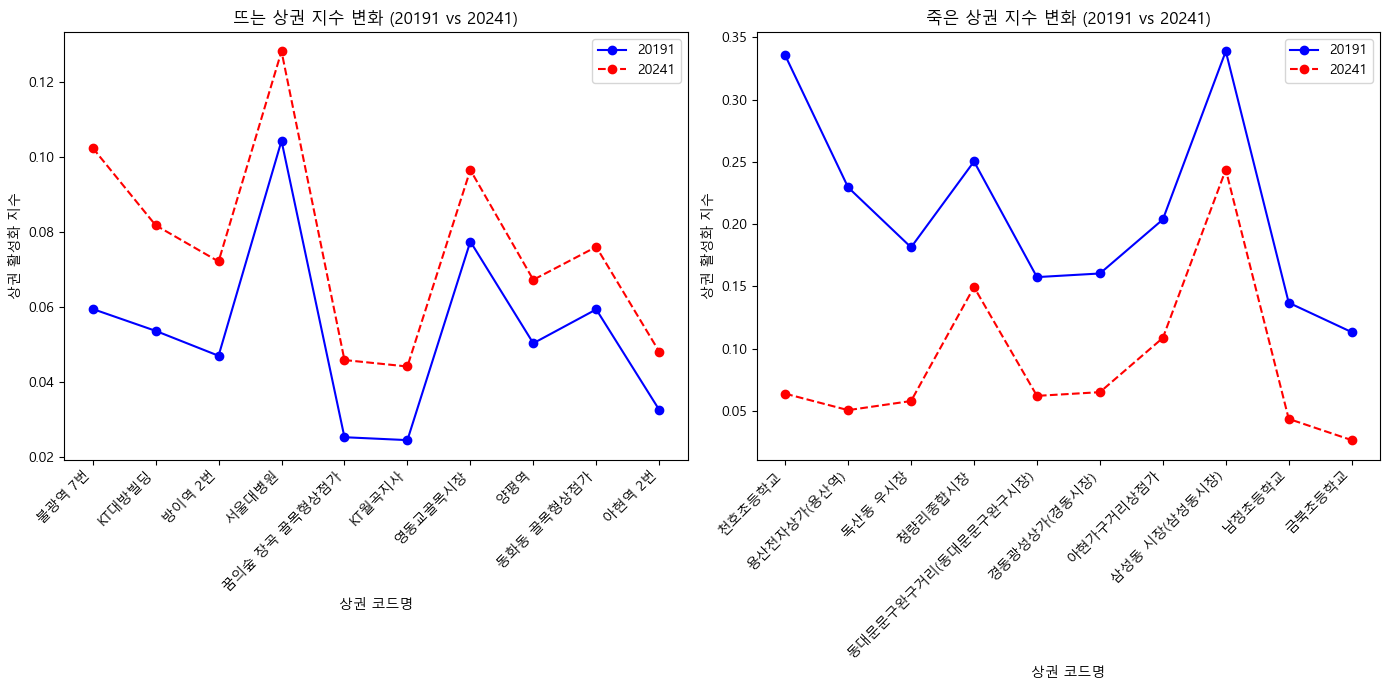

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 상위 10개 선 그래프
plt.figure(figsize=(14, 7))

# 상위 10개
plt.subplot(1, 2, 1)
plt.plot(top_10['상권_코드_명'], top_10[20191], marker='o', linestyle='-', color='blue', label='20191')
plt.plot(top_10['상권_코드_명'], top_10[20241], marker='o', linestyle='--', color='red', label='20241')
plt.xlabel('상권 코드명')
plt.ylabel('상권 활성화 지수')
plt.title('뜨는 상권 지수 변화 (20191 vs 20241)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# 하위 10개
plt.subplot(1, 2, 2)
plt.plot(bottom_10['상권_코드_명'], bottom_10[20191], marker='o', linestyle='-', color='blue', label='20191')
plt.plot(bottom_10['상권_코드_명'], bottom_10[20241], marker='o', linestyle='--', color='red', label='20241')
plt.xlabel('상권 코드명')
plt.ylabel('상권 활성화 지수')
plt.title('죽은 상권 지수 변화 (20191 vs 20241)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


## 죽은상권 & 성장한 상권 10곳 지수 자세히 살펴보기

생산자 물가지수
1. 2019/1 : 100.07
2. 2024/1 : 118.52


약 18% 증가, 매출액볼때 참고

In [30]:
sales_merge_scaled = sales_merge_scaled.drop(columns=['geometry'])

In [31]:
for name in bottom_10_names:
    print(sales_merge_scaled[sales_merge_scaled['상권_코드_명'] == name])

        상권_면적  기준_년분기_코드    상권_코드 상권_코드_명   당월_매출_금액  점포_수  총_유동인구_수  \
3049  59080.0      20191  3111070  천호초등학교  564145184    56   5943141   
3050  59080.0      20241  3111070  천호초등학교  731194468    60   1465864   

       매출액_면적당   점포수_면적당  유동인구_면적당     상권_지수  
3049  0.001621  0.004978  1.000000  0.335533  
3050  0.000503  0.006419  0.184324  0.063749  
        상권_면적  기준_년분기_코드    상권_코드      상권_코드_명       당월_매출_금액  점포_수  총_유동인구_수  \
278  365025.0      20191  3120040  용산전자상가(용산역)  1308873572907  3192   1012493   
279  365025.0      20241  3120040  용산전자상가(용산역)   663928159074  2816   1116252   

      매출액_면적당   점포수_면적당  유동인구_면적당     상권_지수  
278  0.609005  0.051864  0.027538  0.229469  
279  0.074040  0.054782  0.022734  0.050519  
        상권_면적  기준_년분기_코드    상권_코드  상권_코드_명      당월_매출_금액  점포_수  총_유동인구_수  \
2028  63392.0      20191  3130231  독산동 우시장  180411768860   266    230104   
2029  63392.0      20241  3130231  독산동 우시장  195328756828   270    155946   

       매출액_면적당   점포수_면적당  유동인구_

죽은 상권을 크게 두가지의 종류

비슷한 물품을 취급하는 상점가:
용산전자상가(용산역), 동대문완구거리(동대문문구완구시장), 아현가구거리상점가

-> 3개지 지표 모두 고르게 하락

전통시장:
독산동 우시장,  경동광성상가(경동시장) == 청량리종합시장

-> 매출액은 크게 감소하지 않았지만 유동인구 크게 감소
)교

**죽은 상권 : 용산전자상가(용산역), 동대문문구완구거리(동대문문구완구시장),아현가구거리상점가, 독산동 우시장, 청량리종합시장**

In [32]:
for name in top_10_names:
    print(sales_merge_scaled[sales_merge_scaled['상권_코드_명'] == name])

        상권_면적  기준_년분기_코드    상권_코드 상권_코드_명    당월_매출_금액  점포_수  총_유동인구_수  \
1392  88375.0      20191  3110481  불광역 7번  2333248600   252   1400807   
1393  88375.0      20241  3110481  불광역 7번  3932496065   245   3403737   

       매출액_면적당   점포수_면적당  유동인구_면적당     상권_지수  
1392  0.004483  0.016426  0.157570  0.059493  
1393  0.001811  0.019102  0.286107  0.102340  
       상권_면적  기준_년분기_코드    상권_코드 상권_코드_명   당월_매출_금액  점포_수  총_유동인구_수   매출액_면적당  \
2223  8947.0      20191  3110797  KT대방빌딩  433442605    41    113336  0.008227   
2224  8947.0      20241  3110797  KT대방빌딩  675552755    38    255883  0.003073   

       점포수_면적당  유동인구_면적당     상권_지수  
2223  0.026835  0.125957  0.053673  
2224  0.029750  0.212481  0.081768  
        상권_면적  기준_년분기_코드    상권_코드 상권_코드_명    당월_매출_금액  점포_수  총_유동인구_수  \
2963  50911.0      20191  3111030  방이역 2번  2048151009   156    597228   
2964  50911.0      20241  3111030  방이역 2번  4847099423   170   1297146   

       매출액_면적당   점포수_면적당  유동인구_면적당     상권_지수  
2963  0.006832  0

성장한 상권은 (영동교골목시장, 양평역, 아현역 2번)을 제외하고 뚜렷한 성장세를 보임

용산전자상가(용산역), 동대문문구완구거리(동대문문구완구시장),아현가구거리상점가: 모두 비슷한 업종이 모인 상점거리 유형

# 2. 상권 활성화 원인 찾기

## 변수들 설명

1. 성별: 상주인구의 성비 / 서울시 상권분석서비스(상주인구-상권)
2. 거주인구: 상권의 거주인구 수 / 서울시 상권분석서비스(상주인구-상권)
3. 직장인구: 상권의 직장인구 수 / 서울시 상권분석서비스(직장인구-상권)
4. 상권 면적: 해당 상권의 총 면적 / 서울시 상권분석서비스(영역-상권)
5. 유동인구: 해당 상권의 평균 유동인구 / 서울시 상권분석서비스(길단위인구-상권)
6. 소득수준: 해당 상주인구의 평균 소득 / 서울시 상권분석서비스(소득소비-상권)
7. 지출수준: 상주인구의 평균 지출 총금액 / 서울시 상권분석서비스(소득소비-상권)
8. 지하철역: 해당 상권내 지하철 역의 개수 / 서울시 상권분석서비스(집객시설-상권)
9. 버스 정류장: 해당 상권 내에 위치한 버스 정류장의 개수 / 서울시 상권분석서비스(집객시설-상권)

## 2. 파일 로드하기

In [93]:
import pandas as pd
import geopandas as gpd
import numpy as np

path_income = 'data/서울시 상권분석서비스(소득소비-상권).csv'
path_facility = 'data/서울시 상권분석서비스(집객시설-상권).csv'
path_floating = 'data/서울시 상권분석서비스(길단위인구-상권).csv'
path_population = 'data/서울시 상권분석서비스(상주인구-상권).csv'
path_office = 'data/서울시 상권분석서비스(직장인구-상권).csv'
path_area = 'data/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp'

df_income = pd.read_csv(path_income, encoding='euc-kr')
df_facility = pd.read_csv(path_facility, encoding='euc-kr')
df_floating = pd.read_csv(path_floating, encoding='euc-kr')
df_population = pd.read_csv(path_population, encoding='euc-kr')
df_office = pd.read_csv(path_office, encoding='euc-kr')
df_area = gpd.read_file(path_area)

print(df_income.head())
print(df_facility.head())
print(df_floating.head())
print(df_population.head())
print(df_office.head())
print(df_area.head())

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명  월_평균_소득_금액  소득_구간_코드  \
0      20231        A       골목상권  3110005       세검정   3768541.0       8.0   
1      20231        A       골목상권  3110006   부암동주민센터   3963935.0       8.0   
2      20231        A       골목상권  3110025     충신시장옆   2770370.0       6.0   
3      20231        A       골목상권  3110648  양천향교역 7번   3402010.0       7.0   
4      20231        A       골목상권  3110026  종로5가역 4번   2729503.0       6.0   

        지출_총금액   식료품_지출_총금액  의류_신발_지출_총금액  생활용품_지출_총금액   의료비_지출_총금액  \
0  884701599.0  221446948.0   109882417.0   64738346.0  111988892.0   
1  267177363.0   71242932.0    32618743.0   19192280.0   36992515.0   
2  232818153.0   65006144.0    27756184.0   17256496.0   32610254.0   
3          NaN          NaN           NaN          NaN          NaN   
4   76260454.0   21823990.0     9075986.0    6042567.0   10672979.0   

     교통_지출_총금액   여가_지출_총금액   문화_지출_총금액    교육_지출_총금액   유흥_지출_총금액  
0  149822911.0  37478670.0  25606895.0  1265

## 3. 하나의 데이터프레임으로 만들기(상권별로)

In [146]:
required_columns = [
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "월_평균_소득_금액"],  # df1에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명","지하철_역_수", "버스_정거장_수"],         # df2에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_유동인구_수"],         # df3에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_상주인구_수", "남성_상주인구_수", "여성_상주인구_수"] ,      # df4에서 필요한 열
     ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_직장_인구_수"]     # df5에서 필요한 열
   
]
# 필요한 열만 선택
df1_selected = df_income[required_columns[0]]
df2_selected = df_facility[required_columns[1]]
df3_selected = df_floating[required_columns[2]]
df4_selected = df_population[required_columns[3]]
df5_selected = df_office[required_columns[4]]


merged_df = df1_selected
for df in [df2_selected, df3_selected, df4_selected, df5_selected]:
    merged_df = pd.merge(merged_df, df, on=["기준_년분기_코드", "상권_코드", "상권_코드_명"], how="inner")

merged_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,총_직장_인구_수
0,20231,3110005,세검정,3768541.0,NaN,6.0,114445,2153,1046,1107,1057
1,20231,3110006,부암동주민센터,3963935.0,NaN,1.0,8336,671,329,342,27
2,20231,3110025,충신시장옆,2770370.0,NaN,NaN,290561,523,280,243,213
3,20231,3110648,양천향교역 7번,3402010.0,NaN,6.0,154832,1356,587,769,13
4,20231,3110026,종로5가역 4번,2729503.0,NaN,NaN,328618,130,61,69,190
...,...,...,...,...,...,...,...,...,...,...,...
21620,20232,3001492,명동 남대문 북창동 다동 무교동 관광특구,3071908.0,3.0,44.0,7258225,600,365,235,104830
21621,20232,3001493,동대문패션타운 관광특구,3624671.0,5.0,17.0,3408217,1807,941,866,5916
21622,20232,3001494,종로?청계 관광특구,2268084.0,3.0,28.0,8580607,1720,1092,628,32892
21623,20232,3001495,잠실 관광특구,4220819.0,3.0,20.0,4116726,5902,2885,3017,25240


## 4. 변수들 조정

In [148]:
merged_df.loc[:, '상주인구_성비'] = (
    merged_df['남성_상주인구_수'] / 
    merged_df['여성_상주인구_수'] * 100
)
merged_df = merged_df.drop(columns=['남성_상주인구_수', '여성_상주인구_수'])
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['상주인구_성비'], inplace=True)
merged_df 

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비
0,20231,3110005,세검정,3768541.0,NaN,6.0,114445,2153,1057,94.489612
1,20231,3110006,부암동주민센터,3963935.0,NaN,1.0,8336,671,27,96.198830
2,20231,3110025,충신시장옆,2770370.0,NaN,NaN,290561,523,213,115.226337
3,20231,3110648,양천향교역 7번,3402010.0,NaN,6.0,154832,1356,13,76.332900
4,20231,3110026,종로5가역 4번,2729503.0,NaN,NaN,328618,130,190,88.405797
...,...,...,...,...,...,...,...,...,...,...
21620,20232,3001492,명동 남대문 북창동 다동 무교동 관광특구,3071908.0,3.0,44.0,7258225,600,104830,155.319149
21621,20232,3001493,동대문패션타운 관광특구,3624671.0,5.0,17.0,3408217,1807,5916,108.660508
21622,20232,3001494,종로?청계 관광특구,2268084.0,3.0,28.0,8580607,1720,32892,173.885350
21623,20232,3001495,잠실 관광특구,4220819.0,3.0,20.0,4116726,5902,25240,95.624793


In [183]:
merged_df_filtered = merged_df[merged_df["기준_년분기_코드"] == 20241]
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비
6153,20241,3110001,이북5도청사,4354652.0,NaN,8.0,137658,1011,1048,88.619403
6154,20241,3110002,독립문역 1번,3463885.0,1.0,3.0,517847,663,475,96.735905
6155,20241,3110003,세검정초등학교,3474789.0,NaN,10.0,492704,2926,607,93.903247
6156,20241,3110004,대신고등학교,2644953.0,NaN,2.0,733843,529,32,95.925926
6157,20241,3110005,세검정,3768541.0,NaN,6.0,125332,2153,1057,94.489612
...,...,...,...,...,...,...,...,...,...,...
7689,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,3071908.0,3.0,44.0,6889856,600,104830,155.319149
7690,20241,3001493,동대문패션타운 관광특구,3624671.0,5.0,17.0,3384560,1807,5916,108.660508
7691,20241,3001494,종로?청계 관광특구,2268084.0,3.0,28.0,8440796,1720,32892,173.885350
7692,20241,3001495,잠실 관광특구,4220819.0,3.0,20.0,4110178,5902,25240,95.624793


## 5.NAN값 처리
지하쳘, 버스는 nan -> 0

In [184]:
merged_df_filtered.loc[:, '지하철_역_수'] = merged_df_filtered['지하철_역_수'].fillna(0)
merged_df_filtered.loc[:, '버스_정거장_수'] = merged_df_filtered['버스_정거장_수'].fillna(0)
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비
6153,20241,3110001,이북5도청사,4354652.0,0.0,8.0,137658,1011,1048,88.619403
6154,20241,3110002,독립문역 1번,3463885.0,1.0,3.0,517847,663,475,96.735905
6155,20241,3110003,세검정초등학교,3474789.0,0.0,10.0,492704,2926,607,93.903247
6156,20241,3110004,대신고등학교,2644953.0,0.0,2.0,733843,529,32,95.925926
6157,20241,3110005,세검정,3768541.0,0.0,6.0,125332,2153,1057,94.489612
...,...,...,...,...,...,...,...,...,...,...
7689,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,3071908.0,3.0,44.0,6889856,600,104830,155.319149
7690,20241,3001493,동대문패션타운 관광특구,3624671.0,5.0,17.0,3384560,1807,5916,108.660508
7691,20241,3001494,종로?청계 관광특구,2268084.0,3.0,28.0,8440796,1720,32892,173.885350
7692,20241,3001495,잠실 관광특구,4220819.0,3.0,20.0,4110178,5902,25240,95.624793


In [185]:
merged_df_filtered = merged_df_filtered.dropna()
merged_df_filtered
merged_df_filtered.isna().sum().sum()

0

## 6. 각변수 지수화하기(MINN MAX)

In [186]:
import numpy as np

numeric_df = merged_df_filtered.select_dtypes(include=[np.number])

# 무한대 값 확인
print(np.isinf(numeric_df).any())
merged_df_filtered.isna().sum()

기준_년분기_코드     False
상권_코드         False
월_평균_소득_금액    False
지하철_역_수       False
버스_정거장_수      False
총_유동인구_수      False
총_상주인구_수      False
총_직장_인구_수     False
상주인구_성비       False
dtype: bool


기준_년분기_코드     0
상권_코드         0
상권_코드_명       0
월_평균_소득_금액    0
지하철_역_수       0
버스_정거장_수      0
총_유동인구_수      0
총_상주인구_수      0
총_직장_인구_수     0
상주인구_성비       0
dtype: int64

In [187]:
columns_to_scale = [
    '월_평균_소득_금액', '지하철_역_수', '버스_정거장_수',
    '총_유동인구_수', '총_상주인구_수', '총_직장_인구_수',  '상주인구_성비'
]

# NaN 및 Inf 값을 포함하는 행 제거
merged_df_filtered = merged_df_filtered.dropna(subset=columns_to_scale)
merged_df_filtered = merged_df_filtered[~merged_df_filtered.isin([np.inf, -np.inf]).any(axis=1)]

# 정규화할 데이터 추출
data_to_scale = merged_df_filtered[columns_to_scale]

# 정규화 수행
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# 정규화된 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=merged_df_filtered.index)

# 원본 데이터프레임에 정규화된 데이터 병합
merged_df_filtered[columns_to_scale] = scaled_df

# 결과 확인
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비
6153,20241,3110001,이북5도청사,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284
6154,20241,3110002,독립문역 1번,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827
6155,20241,3110003,세검정초등학교,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846
6156,20241,3110004,대신고등학교,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975
6157,20241,3110005,세검정,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463
...,...,...,...,...,...,...,...,...,...,...
7689,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,0.280277,0.6,0.517647,0.816256,0.028024,1.000000,0.163494
7690,20241,3001493,동대문패션타운 관광특구,0.344223,1.0,0.200000,0.400976,0.084587,0.056425,0.114379
7691,20241,3001494,종로?청계 관광특구,0.187287,0.6,0.329412,1.000000,0.080510,0.313759,0.183037
7692,20241,3001495,잠실 관광특구,0.413188,0.6,0.235294,0.486941,0.276489,0.240764,0.100658


In [188]:
merged_df_filtered = merged_df_filtered.dropna()
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비
6153,20241,3110001,이북5도청사,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284
6154,20241,3110002,독립문역 1번,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827
6155,20241,3110003,세검정초등학교,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846
6156,20241,3110004,대신고등학교,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975
6157,20241,3110005,세검정,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463
...,...,...,...,...,...,...,...,...,...,...
7689,20241,3001492,명동 남대문 북창동 다동 무교동 관광특구,0.280277,0.6,0.517647,0.816256,0.028024,1.000000,0.163494
7690,20241,3001493,동대문패션타운 관광특구,0.344223,1.0,0.200000,0.400976,0.084587,0.056425,0.114379
7691,20241,3001494,종로?청계 관광특구,0.187287,0.6,0.329412,1.000000,0.080510,0.313759,0.183037
7692,20241,3001495,잠실 관광특구,0.413188,0.6,0.235294,0.486941,0.276489,0.240764,0.100658


In [189]:
pivot_table['상권_코드'] = pivot_table['상권_코드'].astype(int)
pivot_table

,상권_코드_명,상권_코드,20191,20241,geometry,지수_변화
0,이태원 관광특구,3001491,0.042915,0.028126,"POLYGON ((200205.11 448754.4, 200208.852 44875...",-0.014790
2,강남 마이스 관광특구,3001496,0.068098,0.018822,"POLYGON ((205269.67 445368.325, 205255.648 445...",-0.049276
3,이북5도청사,3110001,0.005347,0.003713,"POLYGON ((196149.595 456888.793, 196156.405 45...",-0.001634
4,독립문역 1번,3110002,0.068599,0.049200,"POLYGON ((196119.49 453007.571, 196143.854 452...",-0.019399
5,세검정초등학교,3110003,0.013267,0.007667,"POLYGON ((196498.033 456292.516, 196499.302 45...",-0.005600
...,...,...,...,...,...,...
1559,둔촌역전통시장,3130323,0.044665,0.036417,"POLYGON ((211924.717 447688.584, 211931.962 44...",-0.008247
1560,길동복조리시장,3130324,0.058359,0.058849,"POLYGON ((212814.498 448972.661, 212804.818 44...",0.000490
1561,명일전통시장,3130325,0.038154,0.040527,"POLYGON ((212922.264 449886.083, 212922.218 44...",0.002373
1562,고덕 골목형상점가,3130326,0.013642,0.029003,"POLYGON ((214945 451011.141, 214946.951 450967...",0.015361


In [191]:
final_df = pd.merge(merged_df_filtered, pivot_table[['상권_코드',  20241]], on='상권_코드', how='left')
final_df = final_df.dropna()
final_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비,20241
0,20241,3110001,이북5도청사,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284,0.003713
1,20241,3110002,독립문역 1번,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827,0.049200
2,20241,3110003,세검정초등학교,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846,0.007667
3,20241,3110004,대신고등학교,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975,0.100184
4,20241,3110005,세검정,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463,0.001728
...,...,...,...,...,...,...,...,...,...,...,...
1529,20241,3130324,길동복조리시장,0.220401,0.0,0.000000,0.065952,0.062562,0.001460,0.099296,0.058849
1530,20241,3130325,명일전통시장,0.340578,0.0,0.000000,0.039783,0.097802,0.000839,0.103961,0.040527
1531,20241,3130326,고덕 골목형상점가,0.197467,0.0,0.011765,0.014168,0.005717,0.008910,0.095547,0.029003
1532,20241,3001491,이태원 관광특구,0.276160,0.2,0.164706,0.255328,0.250012,0.055691,0.093882,0.028126


In [192]:
final_df = final_df.rename(columns={
    20241 : '상권_활성화_지수'
})
final_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비,상권_활성화_지수
0,20241,3110001,이북5도청사,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284,0.003713
1,20241,3110002,독립문역 1번,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827,0.049200
2,20241,3110003,세검정초등학교,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846,0.007667
3,20241,3110004,대신고등학교,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975,0.100184
4,20241,3110005,세검정,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463,0.001728
...,...,...,...,...,...,...,...,...,...,...,...
1529,20241,3130324,길동복조리시장,0.220401,0.0,0.000000,0.065952,0.062562,0.001460,0.099296,0.058849
1530,20241,3130325,명일전통시장,0.340578,0.0,0.000000,0.039783,0.097802,0.000839,0.103961,0.040527
1531,20241,3130326,고덕 골목형상점가,0.197467,0.0,0.011765,0.014168,0.005717,0.008910,0.095547,0.029003
1532,20241,3001491,이태원 관광특구,0.276160,0.2,0.164706,0.255328,0.250012,0.055691,0.093882,0.028126


## 7. 상권 활성화 지수와의 상관관계분석

In [193]:
columns_to_analyze = [
    '월_평균_소득_금액', '지하철_역_수', '버스_정거장_수',
    '총_유동인구_수', '총_상주인구_수', '총_직장_인구_수', '상주인구_성비', '상권_활성화_지수'
]
df_analysis = final_df[columns_to_analyze]
df_analysis

,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비,상권_활성화_지수
0,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284,0.003713
1,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827,0.049200
2,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846,0.007667
3,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975,0.100184
4,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463,0.001728
...,...,...,...,...,...,...,...,...
1529,0.220401,0.0,0.000000,0.065952,0.062562,0.001460,0.099296,0.058849
1530,0.340578,0.0,0.000000,0.039783,0.097802,0.000839,0.103961,0.040527
1531,0.197467,0.0,0.011765,0.014168,0.005717,0.008910,0.095547,0.029003
1532,0.276160,0.2,0.164706,0.255328,0.250012,0.055691,0.093882,0.028126


In [194]:
correlation_matrix = df_analysis.corr()
correlation_with_activation = correlation_matrix['상권_활성화_지수'].sort_values(ascending=False)

# 결과 출력
print(correlation_with_activation)

상권_활성화_지수     1.000000
총_유동인구_수      0.286820
상주인구_성비       0.098366
지하철_역_수       0.017849
총_직장_인구_수    -0.040843
총_상주인구_수     -0.071068
버스_정거장_수     -0.106862
월_평균_소득_금액   -0.140612
Name: 상권_활성화_지수, dtype: float64


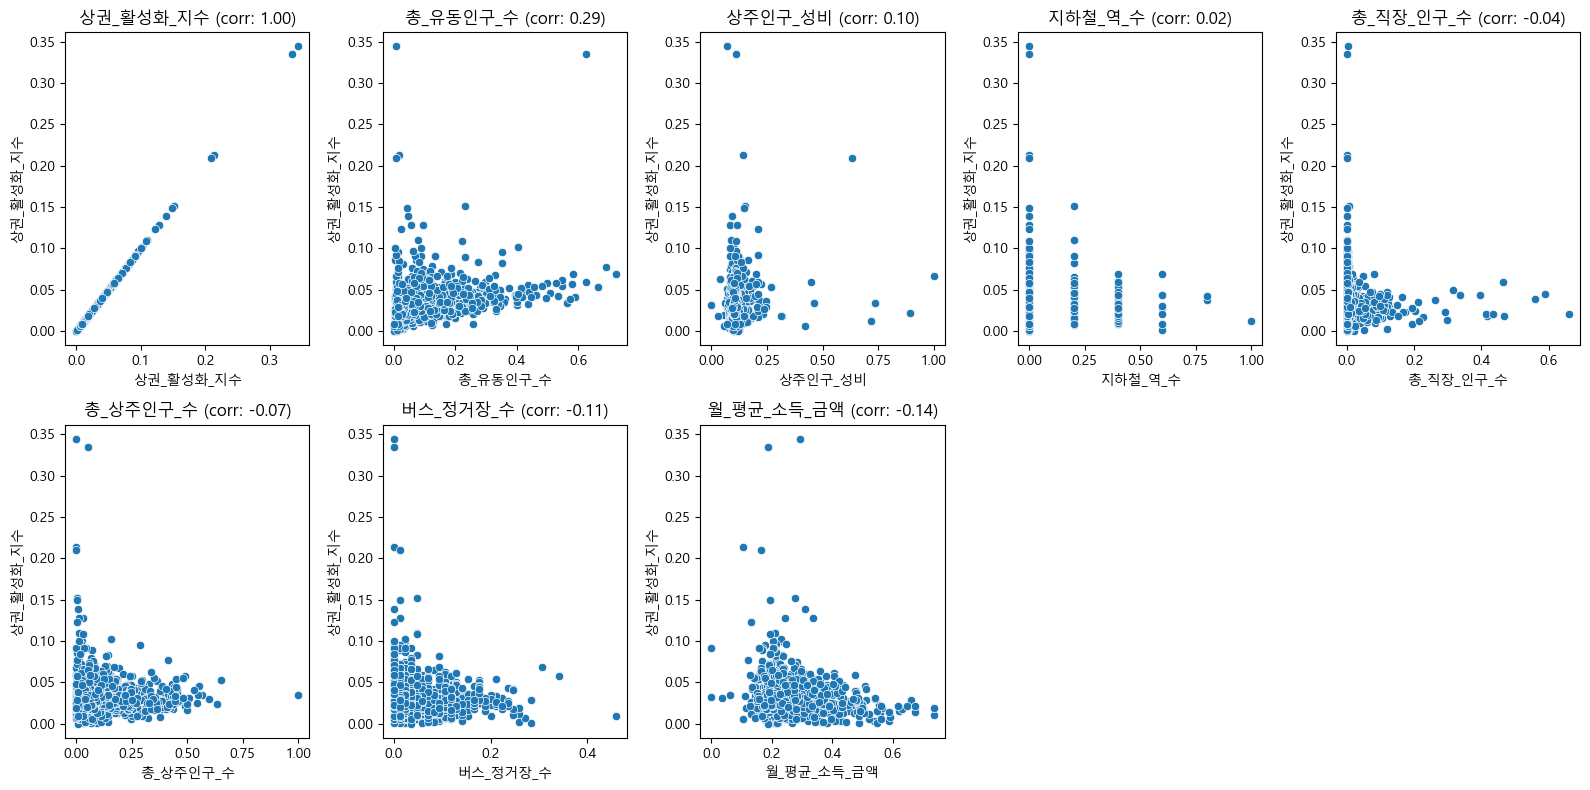

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우 맑은 고딕 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


plt.figure(figsize=(16, 8))

for i, column in enumerate(correlation_with_activation.index):
    plt.subplot(2, 5, i + 1)
    sns.scatterplot(x=df_analysis[column], y=df_analysis['상권_활성화_지수'])
    plt.title(f'{column} (corr: {correlation_with_activation[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('상권_활성화_지수')

plt.tight_layout()
plt.show()

**상권 활성화의 주요 원인: 직장 인구수, 교통 편리성(버스+지하철)**

In [165]:
#교통 편리성: 버스와 지하철을 모두 고려한 변수
df_analysis.loc[:, '교통_편리성'] = (df_analysis['지하철_역_수'] + df_analysis['버스_정거장_수']) / 2
df_analysis

C:\Users\j2982\AppData\Local\Temp\ipykernel_23524\2854329195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.loc[:, '교통_편리성'] = (df_analysis['지하철_역_수'] + df_analysis['버스_정거장_수']) / 2


,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비,상권_활성화_지수,교통_편리성
0,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.098696,0.099463,0.001728,0.035294
1,0.383471,0.0,0.011765,0.000901,0.031351,0.000248,0.036340,0.101262,0.000401,0.005882
2,0.245394,0.0,0.000000,0.047179,0.024415,0.002022,0.015085,0.121291,0.028946,0.000000
3,0.318465,0.0,0.070588,0.014662,0.063452,0.000114,0.114570,0.080350,0.003867,0.035294
4,0.387690,0.0,0.000000,0.041348,0.028633,0.016045,0.024408,0.089093,0.019873,0.000000
...,...,...,...,...,...,...,...,...,...,...
1435,0.735959,0.0,0.094118,0.012947,0.000797,0.151704,0.095839,0.144737,0.018822,0.047059
1436,0.231319,0.0,0.082353,0.037581,0.032991,0.004388,0.031808,0.108903,0.016197,0.041176
1437,0.185845,0.0,0.035294,0.000000,0.007357,0.000534,0.079901,0.120910,0.000205,0.017647
1438,0.197465,0.0,0.058824,0.023195,0.007498,0.002175,0.012827,0.463158,0.034073,0.029412


In [166]:
#교통 편리성: 버스와 지하철을 모두 고려한 변수
final_df.loc[:, '교통_편리성'] = (final_df['지하철_역_수'] + final_df['버스_정거장_수']) / 2
final_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상주인구_성비,상권_활성화_지수,교통_편리성
0,20241,3110001,이북5도청사,0.428671,0.0,0.094118,0.016308,0.047284,0.009988,0.093284,0.003713,0.047059
1,20241,3110002,독립문역 1번,0.325623,0.2,0.035294,0.061349,0.030976,0.004522,0.101827,0.049200,0.117647
2,20241,3110003,세검정초등학교,0.326884,0.0,0.117647,0.058371,0.137026,0.005781,0.098846,0.007667,0.058824
3,20241,3110004,대신고등학교,0.230885,0.0,0.023529,0.086939,0.024697,0.000296,0.100975,0.100184,0.011765
4,20241,3110005,세검정,0.360867,0.0,0.070588,0.014847,0.100801,0.010074,0.099463,0.001728,0.035294
...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20241,3130324,길동복조리시장,0.220401,0.0,0.000000,0.065952,0.062562,0.001460,0.099296,0.058849,0.000000
1530,20241,3130325,명일전통시장,0.340578,0.0,0.000000,0.039783,0.097802,0.000839,0.103961,0.040527,0.000000
1531,20241,3130326,고덕 골목형상점가,0.197467,0.0,0.011765,0.014168,0.005717,0.008910,0.095547,0.029003,0.005882
1532,20241,3001491,이태원 관광특구,0.276160,0.2,0.164706,0.255328,0.250012,0.055691,0.093882,0.028126,0.182353


In [79]:
pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     -------- ------------------------------ 20.5/88.8 kB 65.2 kB/s eta 0:00:02
     -------- ------------------------------ 20.5/88.8 kB 65.2 kB/s eta 0:00:02
     ------------- ------------------------- 30.7/88.8 kB 72.6 kB/s eta 0:00:01
     ------------- ------------------------- 30.7/88.8 kB 72.6 kB/s eta 0:00:01
     ----------------- --------------------- 41.0/88.8 kB 81.9 kB/s eta 0:00:01
     -------------------------- ----------- 61.4/88.8 kB 121.3 kB/s eta 0:00:01
     -------------------------------------- 88.8/88.8 kB 167.5 kB/s eta 0:00:00
  In


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


해당 산접도는 태블로로 다시 그림(상세정보 확인 가능)

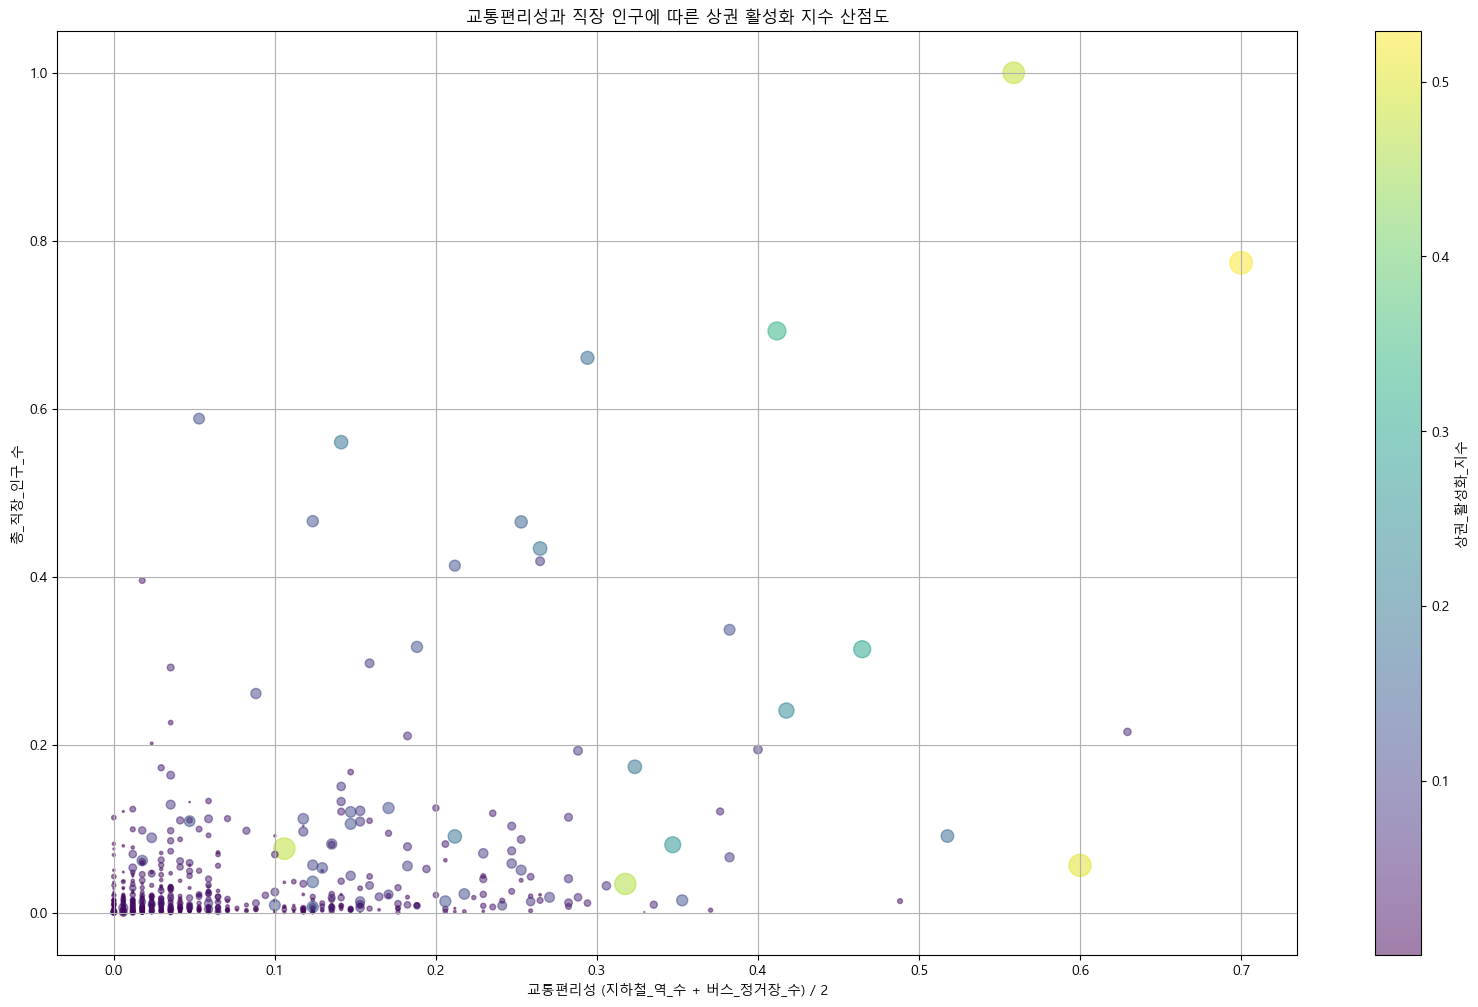

In [81]:
import mplcursors

# 산점도 그리기
plt.figure(figsize=(20, 12))  # 플롯 크기를 키움

# 산점도
scatter = plt.scatter(
    final_df['교통_편리성'],
    final_df['총_직장_인구_수'],
    s=final_df['상권_활성화_지수'] * 500,  # 상권 활성화 지수를 원의 크기로, 스케일 조정
    alpha=0.5,
    c=final_df['상권_활성화_지수'],  # 상권 활성화 지수를 색상으로
    cmap='viridis'
)

# 색상 바
plt.colorbar(scatter, label='상권_활성화_지수')

plt.xlabel('교통편리성 (지하철_역_수 + 버스_정거장_수) / 2')
plt.ylabel('총_직장_인구_수')
plt.title('교통편리성과 직장 인구에 따른 상권 활성화 지수 산점도')
plt.grid(True)

# mplcursors for interactive annotations
cursor = mplcursors.cursor(scatter, hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set(text=(
        f"상권_코드: {df_analysis.iloc[index]['상권_코드']}\n"
        f"상권_코드_명: {df_analysis.iloc[index]['상권_코드_명']}\n"
        f"교통_편리성: {df_analysis.iloc[index]['교통_편리성']}\n"
        f"총_직장_인구_수: {df_analysis.iloc[index]['총_직장_인구_수']}\n"
        f"상권_활성화_지수: {df_analysis.iloc[index]['상권_활성화_지수']}"
    ))

plt.show()

## 죽은상권의 유동인구 자세히 보기

In [3]:
df_floating.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_유동인구_수',
       '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
       '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
       '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수',
       '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수',
       '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [17]:
df_floating_selected = df_floating[['기준_년분기_코드', '상권_코드', '상권_코드_명','총_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수',
'연령대_30_유동인구_수','연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']]
df_floating_selected = df_floating_selected[df_floating_selected['상권_코드_명'] == '독산동 우시장']
df_floating_selected = df_floating_selected.sort_values('기준_년분기_코드')
df_floating_selected

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
33089,20191,3130231,독산동 우시장,230104,20818,36166,42635,38540,44597,47346
31439,20192,3130231,독산동 우시장,218148,20139,34571,41174,36717,42395,43153
29789,20193,3130231,독산동 우시장,226194,19781,36486,43763,38020,43005,45140
28139,20194,3130231,독산동 우시장,272955,25870,42245,51713,45841,50415,56872
26489,20201,3130231,독산동 우시장,238214,21593,40930,47074,38798,42754,47065
24839,20202,3130231,독산동 우시장,173054,15253,29285,35705,28463,30681,33666
23189,20203,3130231,독산동 우시장,170238,15363,28570,35748,28975,29803,31777
21539,20204,3130231,독산동 우시장,169593,16725,27420,35217,28676,29436,32117
19889,20211,3130231,독산동 우시장,164015,15493,26605,34376,27856,28400,31286
18239,20212,3130231,독산동 우시장,157595,15293,26038,32825,26896,27490,29053


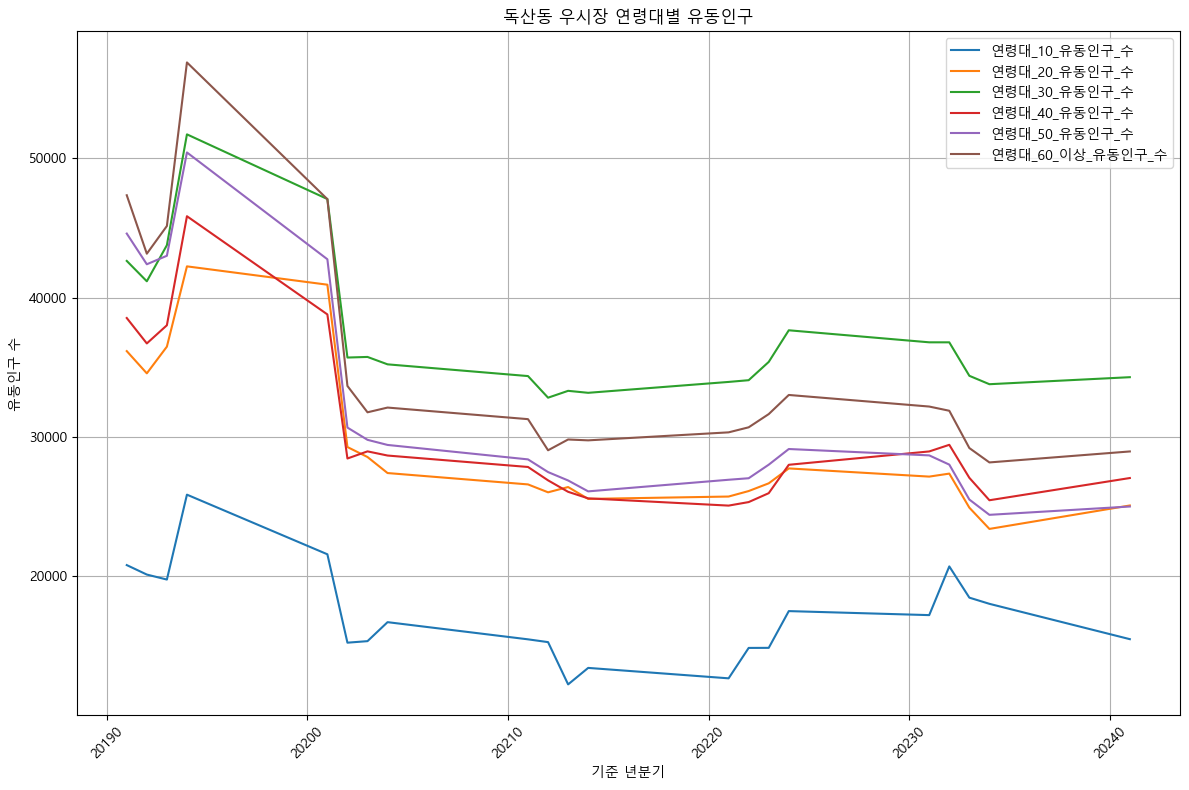

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
plt.figure(figsize=(12, 8))
for column in df_floating_selected.columns[4:]:
    plt.plot(df_floating_selected['기준_년분기_코드'], df_floating_selected[column], label=column)


plt.xlabel('기준 년분기')
plt.ylabel('유동인구 수')
plt.title('독산동 우시장 연령대별 유동인구')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [27]:
df_floating_medicine = df_floating[['기준_년분기_코드', '상권_코드', '상권_코드_명','총_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수',
'연령대_30_유동인구_수','연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']]
df_floating_medicine = df_floating_medicine[df_floating_medicine['상권_코드_명'] == '경동광성상가(경동시장)']
df_floating_medicine = df_floating_medicine.sort_values('기준_년분기_코드')
df_floating_medicine

,기준_년분기_코드,상권_코드,상권_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
33233,20191,3130087,경동광성상가(경동시장),188520,8321,16977,19022,23542,36178,84479
31583,20192,3130087,경동광성상가(경동시장),216430,9511,20438,21627,27012,40840,97002
29933,20193,3130087,경동광성상가(경동시장),185974,8098,18702,18782,23225,33684,83483
28283,20194,3130087,경동광성상가(경동시장),135053,6050,13343,14007,17680,23499,60476
26633,20201,3130087,경동광성상가(경동시장),137845,5729,13673,15582,17776,24470,60614
24983,20202,3130087,경동광성상가(경동시장),156671,6631,16068,17294,20328,28471,67878
23333,20203,3130087,경동광성상가(경동시장),205107,7742,18224,21101,27125,37895,93020
21683,20204,3130087,경동광성상가(경동시장),194809,7074,17478,20114,25665,36439,88036
20033,20211,3130087,경동광성상가(경동시장),187457,6680,16690,19818,24768,35411,84090
18383,20212,3130087,경동광성상가(경동시장),186318,6678,16522,19811,24552,35821,82935


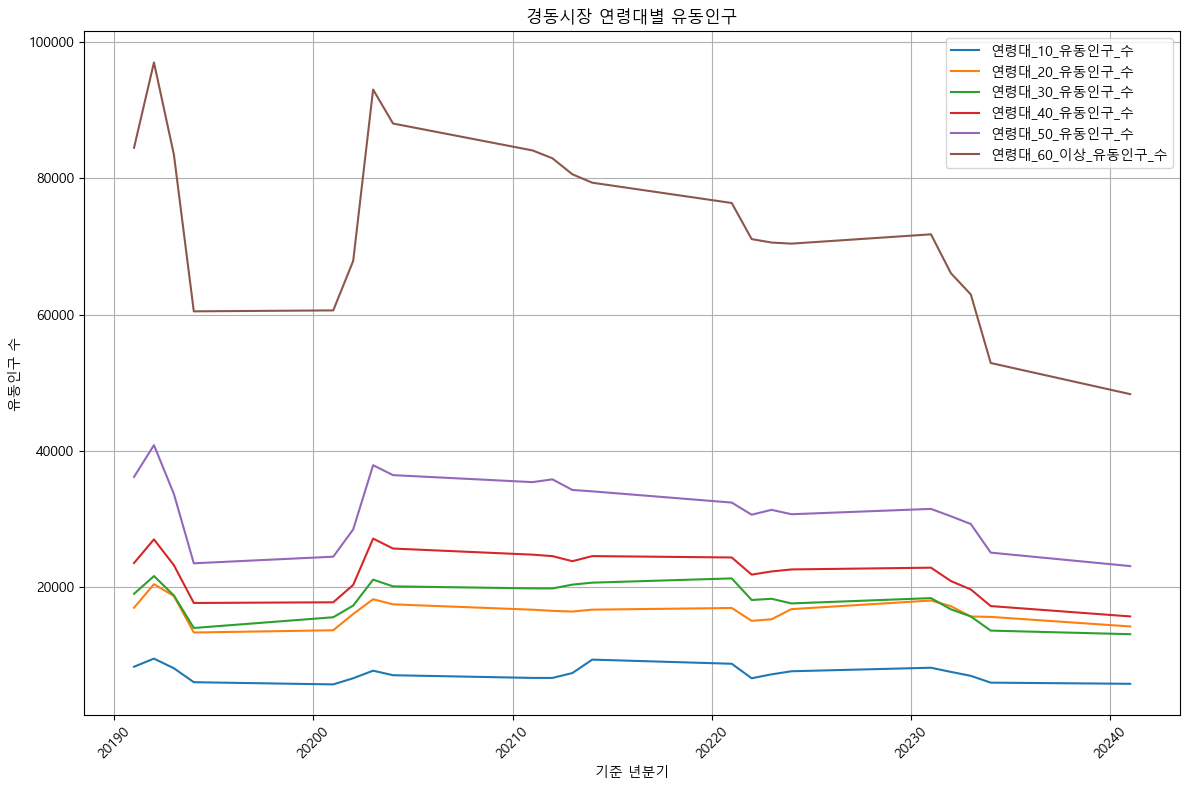

In [29]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
plt.figure(figsize=(12, 8))
for column in df_floating_medicine.columns[4:]:
    plt.plot(df_floating_medicine['기준_년분기_코드'], df_floating_medicine[column], label=column)


plt.xlabel('기준 년분기')
plt.ylabel('유동인구 수')
plt.title('경동시장 연령대별 유동인구')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()